# K Means Clustering

In [1]:
import mglearn

Steps of a K Means clustering algorithm

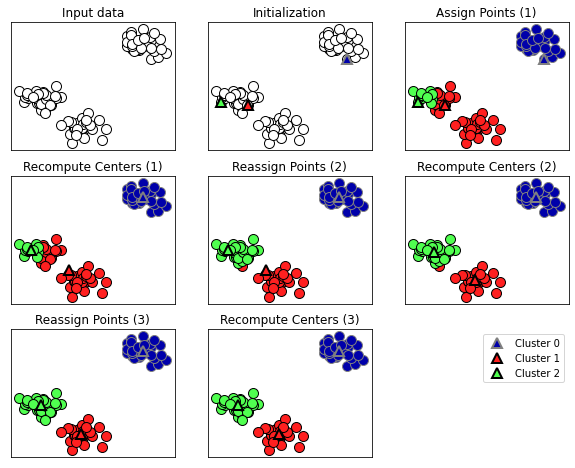

In [2]:
mglearn.plots.plot_kmeans_algorithm()

First, initialization takes place where randonly 3 points are selected and marked as cluster centres. After this, the points are alloted to its data center. After this the data center updates itself and assign itself the mean of updated points. This process repeats two times after which the center does not change and the algorithm stops.

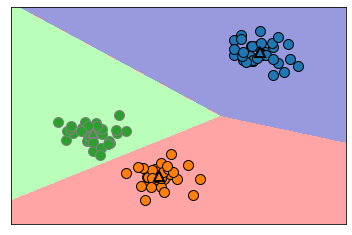

In [3]:
mglearn.plots.plot_kmeans_boundaries()

##### Applying K Means clustering on make_blobs() dataset

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [5]:
x, y = make_blobs(random_state=1)

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [7]:
print("\nCluster labels {}".format(kmeans.labels_))

## During the fitting of data in KMeans, the clustering takes place and each x value is assigned a label. Here, we asked for 3 labels so we got the labels as 0, 1 and 2.


Cluster labels [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [8]:
# print(kmeans.predict(x))

## predict() method is used to assign cluster labels to new points (for testing purposes). Here, since the labels_ and predict(x) give the same result.

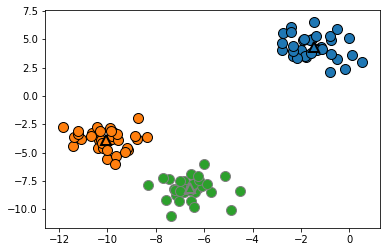

In [10]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                        kmeans.cluster_centers_[:, 1], [0, 1, 2],
                        markers='^', markeredgewidth=2)

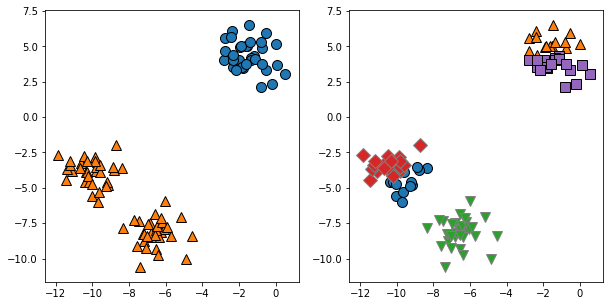

In [13]:
import matplotlib.pyplot as plt


# Using 2 cluster centers 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes[0])


# Using 5 cluster centres

kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes[1])

#### Failure of k-means

Text(0, 0.5, 'Feature 1')

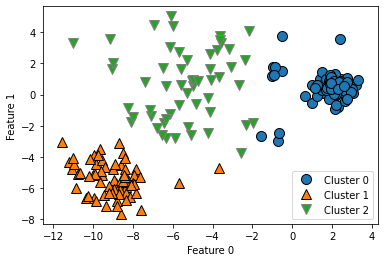

In [14]:
x_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x_varied)
mglearn.discrete_scatter(x_varied[:, 0], x_varied[:, 1], y_pred) 
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, the "green" cluster is not a separate cluster, rather some points from Cluster 0 and 1 reach out to the centre and make up the Cluster 2

import numpy as npA major assumption with K Means is that all the directions are equally important. If the groups of data are strechted towards a certain direction, then K Means will fail as it will only consider the distance from the center and will include points from other clusters.

Text(0, 0.5, 'Feature 1')

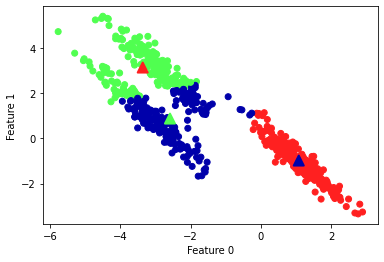

In [26]:
import numpy as np

## Generate some random cluster data
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

## Transform the data to be stretched 

transformation = rng.normal(size=(2, 2))
x = np.dot(x, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='^', c=[2, 0, 1], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Here, the diagonal data belongs to the same class, however, K Means clustering failed to classify them as it considers the distances from the centers irrespective of the axis. In other words, it fails to identify non-spherical data.

Text(0, 0.5, 'Feature 1')

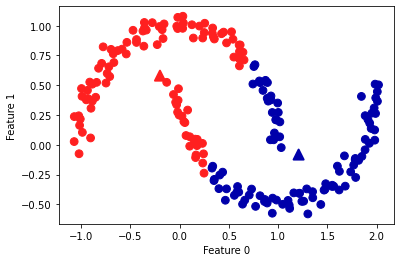

In [31]:
## K Means also performs poorly for complex shapes like the two moons dataset

from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], 
           s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, the K Means Clustering cannot identify the two moons separately.

### K Means as decomposition (Vector quantization)

Vector quantization is defined as the process of representing each data point of a cluster using its cluster center. 

In [41]:
## Let us compare PCA, NMF and k-Means by showing the components extracted 
## by different methods of faces. 

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=3, resize=1)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # Taking 50 images of each person
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# Dividing by 255 so that each value lies between 0 and 1
X_people = X_people / 255
print(X_people)

C:\Users\eshub\AppData\Local\Temp\ipykernel_20692\2307942650.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00017942 0.00020505 0.00018967 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00020505 0.00023581 0.00026656 ... 0.00066128 0.00066128 0.00069204]
 [0.00196335 0.0030091  0.00293221 ... 0.00026144 0.00034858 0.00050237]
 [0.         0.         0.         ... 0.0032039  0.00143535 0.00139946]]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

ValueError: Found input variables with inconsistent numbers of samples: [4617, 3632]